In [59]:
import tensorflow as tf
from tensorflow import image
from tensorflow.keras import layers, models, preprocessing
import matplotlib.pyplot as plt
import pathlib
import numpy as np
print(tf.__version__)

2.1.0


In [ ]:
# from titles get labels 
# after extracting labels separate into training, validation and testing sets

In [2]:
import random

data_dir = "AKOA_Analysis"

data_dir = pathlib.Path(data_dir)

print('total images', len(list(data_dir.glob('*.png'))))

left_images = list(data_dir.glob('*left*.png'))
left_underscored = list(data_dir.glob('*L_E_F_T*.png'))
left_images = left_images + left_underscored
print('left images', len(left_images))

right_images = list(data_dir.glob('*right*.png'))
right_underscored = list(data_dir.glob('*R_I_G_H_T*.png'))
right_images = right_images + right_underscored
print('right count', len(right_images))

print('sum ', len(right_images)+len(left_images))

#need to normalise stuff

total images 10023
left images 4400
right count 5623
sum  10023


AKOA_Analysis\OAI9292081_BaseLine_3_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_22.png
AKOA_Analysis\OAI9084244_BaseLine_101_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_26.png


Text(0.5, 1.0, '')

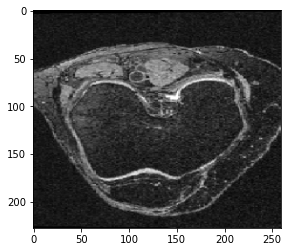

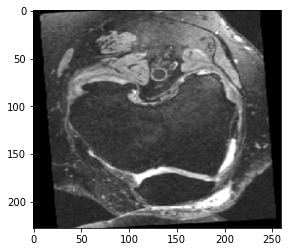

In [4]:
#Unneccessary 
print(left_images[1])
img = plt.imread(left_images[1])
plt.imshow(img)

plt.figure()
img1 = plt.imread(right_images[1])
plt.imshow(img1)
plt.title(print(right_images[1]))

TODO Need to randomise the collection of images, then take a selection for training, testing (10%??) and validation. 
then do the binary CNN.
It might be good to create a labels array for the things, so if left is in title then that one has a left label assigned to it (??). This would incoporate into the previous iteration of the CNN decently. 

Note in README, mention packages used, format of data to be inputted, the required version of tensorflow

In [67]:
# Randomising the collection of images

total_images = list(data_dir.glob('*.png'))
print('total images first', total_images[1])
random.seed(12)
random.shuffle(total_images)
print('total images first post shuffle', total_images[1])

# want to extract the labels for 
# Need to take a selection for training, testing and validation 

total images first AKOA_Analysis\OAI9292081_BaseLine_3_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_22.png
total images first post shuffle AKOA_Analysis\OAI9501369_BaseLine_100_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_11.png


In [15]:
total_images_labels =np.array([None]*len(total_images))
left = ["left", "l_e_f_t"]
right = ["right", "r_i_g_h_t"]

for i in range(len(total_images)):
    path = total_images[i]
    path = str(path).lower()
    total_images_labels = total_images_labels.reshape((10023,1))
    if any(x in path for x in left):
        total_images_labels[i] ="left"
    elif any(x in path for x in right):
        total_images_labels[i] ="right"
    else:
        print(total_images[i])

#total_labels = total_images_labels.reshape((10023,1))
#print(total_images_labels)
#print(total_images[8])
print(total_images_labels.shape)

10023
(10023, 1)
(10023, 1)


In [62]:
# only using the non-tf packages for the preprocessing of data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [72]:
# read in all the images to the list 
#new
loaded_images = np.array([None]*total_images_labels.shape[0])
for i in range(len(total_images)):
    #loade_images[i] = tf.image.resize(total_images[i])
    loaded_images[i] = plt.imread(total_images[i]).reshape((1, 228, 260, 3))
    #loaded_images[i] = (tf.image.resize_with_pad((plt.imread(total_images[i])),55,55,method=image.ResizeMethod.BILINEAR, antialias=True)).reshape((1,55,55,3))
    #total_images[i]= plt.imread(total_images[i])
    #new
    #loaded_images.append(img_data)


In [18]:
#fixing the shape of the images data
print(loaded_images.shape)
print(loaded_images[1].shape)
#for i in range(len(loaded_images)):
#loaded_images_2 = loaded_images.reshape((10023, 228, 260, 3))
loaded_images =np.concatenate(loaded_images, axis=0)
print(loaded_images.shape)

(10023,)
(1, 228, 260, 3)
(10023, 228, 260, 3)


In [19]:
print(loaded_images.shape)
print(total_images_labels.shape)

(10023, 228, 260, 3)
(10023, 1)


Text(0.5, 0, "['left']")

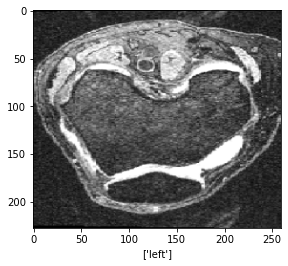

In [21]:
plt.imshow(loaded_images[23])
plt.xlabel(total_images_labels[23])


(228, 260, 3)
['right']


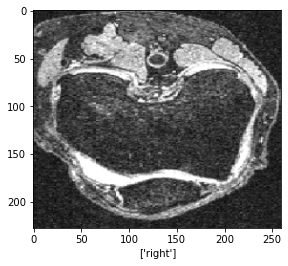

In [25]:

train_images, test_images, train_labels, test_labels = train_test_split(loaded_images,total_images_labels,test_size=0.25, random_state=42)

#print(img1.shape)
# TODO I don't think the stuff is in the right format yet. 
#Might need to reshape it so in form e.g. images: (10023, 228, 260,3), labels: (10023, 1)
plt.imshow(train_images[4])
plt.xlabel(train_labels[4])
print(train_images[4].shape)
print(train_labels[4])

In [50]:
#Function for model
# below model taken from Demo 2 CIFAR classification
laterality = ['left', 'right']
n_laterality = len(laterality)


"""Model for binary classification """
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), activation ='relu',padding='same', input_shape = (228, 260, 3)),
    #tf.keras.layers.Conv2D(128,(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256,(3,3), activation='relu',padding='same'),
    #tf.keras.layers.Conv2D(256,(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Dense(n_laterality, activation='softmax')
])

#this below stuff may end up going into the driver script ??
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics =["accuracy"])

#fit the keras model to the dataset
history=model.fit(train_images,train_labels,batch_size=32, epochs=10, validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

ResourceExhaustedError: OOM when allocating tensor with shape[948480,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:RandomUniform]